# ABOUT TEAM
- STT nhóm:
- Các thành viên:
    + 18120507 Trương Công Phu
    + 18120514 Phan Thiên Phúc
    + 18120517 Nguyễn Công Bình Phương
    + 18120532 Nguyễn Hoàng Sang
    + 18120626 Đặng Quang Trường

# PHÂN TÍCH DỮ LIỆU VIỆT NAM

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# ABOUT DATA

Đây là dữ liệu về chất lượng không khí ở Việt Nam vào năm 2021 theo các trạm chính

Mô tả về các cột:
- Location: Vị trí của trạm dự báo
- Station name: tên trạm dự báo
- Url: link nguồn số liệu
- Dominent pollutant: Chất ô nhiễm nổi bật
- CO: Chỉ số khí CO
- Dew: Chỉ số sương
- Humidity: Chỉ số độ ẩm
- NO2: Chỉ số khí NO2
- O3: Chỉ số khí O3
- Pressure: Áp suất không khí
- PM10: chỉ số bụi mịn PM10
- PM2.5: Chỉ số bụi mịn PM2.5
- SO2: Chỉ số khí SO2
- Temperature: Nhiệt độ
- Wind: tốc độ gió
- Data Time S: thời gian của các số liệu theo tưng entry
- Data Time Tz: múi giờ
- Status: Trạng thái của mức độ ưu nhiễm
- Alert level: Mức độ cảnh báo ô nhiễm

## PREPROCESSING

- Đầu tiên ta xem qua dữ liệu như thế nào

In [2]:
data = pd.read_csv('historical_air_quality_2021_en.csv',index_col=0)

In [3]:
data.head()

,Station ID,AQI index,Location,Station name,Url,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Data Time Tz,Status,Alert level
_id,,,,,,,,,,,,,,,,,,,,,
1,8767,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,NaN,83.0,-,-,1009.0,NaN,102.00,-,27.0,3.6,2021-01-21T19:00:00,+07:00,Unhealthy for sensitive groups,3
2,8688,221.00,"21.0811211,105.8180306","United Nations International School of Hanoi, ...",https://aqicn.org/city/vietnam/hanoi/unis,aqi,-,NaN,77.0,-,-,1015.0,NaN,-,-,18.0,1.5,2021-01-21T20:00:00,+07:00,Very unhealthy,5
3,8641,281.00,"21.0215063,105.8188748","Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",https://aqicn.org/city/vietnam/hanoi/us-embassy,pm25,0.30,NaN,77.0,8.70,0.90,1015.0,NaN,281.00,2.10,18.0,1.5,2021-01-21T20:00:00,+07:00,Very unhealthy,5
4,13012,36.00,"13.998599,107.996482","Gia Lai/phường Thống Nhất - Pleiku, Vietnam",https://aqicn.org/city/vietnam/gia-lai/phuong-...,pm25,3.00,NaN,60.2,6.00,9.00,923.7,29.00,36.00,1.00,24.3,1.0,2021-01-21T20:00:00,+07:00,Good,1
5,12488,68.00,"16.46226,107.596351","Thừa Thiên Huế/83 Hùng Vương, Vietnam",https://aqicn.org/city/vietnam/thua-thien-hue/...,pm25,2.00,NaN,88.0,-,-,1015.0,52.00,68.00,-,21.0,1.0,2021-01-21T19:00:00,+07:00,Moderate,2


In [4]:
data.shape

(805, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 1 to 805
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          805 non-null    int64  
 1   AQI index           801 non-null    object 
 2   Location            805 non-null    object 
 3   Station name        805 non-null    object 
 4   Url                 805 non-null    object 
 5   Dominent pollutant  685 non-null    object 
 6   CO                  805 non-null    object 
 7   Dew                 460 non-null    float64
 8   Humidity            805 non-null    float64
 9   NO2                 805 non-null    object 
 10  O3                  805 non-null    object 
 11  Pressure            805 non-null    float64
 12  PM10                773 non-null    object 
 13  PM2.5               804 non-null    object 
 14  SO2                 804 non-null    object 
 15  Temperature         805 non-null    float64
 16  Wind    

Dữ liệu bao gồm 805 dòng và 21 cột. Điều kì lạ là có các cột chỉ số lại mang kiểu dữ liệu object, có lẽ có vấn đề gì đó

In [6]:
data.describe()

,Station ID,Dew,Humidity,Pressure,Temperature,Wind,Alert level
count,805.000000,460.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,11079.826087,17.888478,70.530559,1007.371677,22.656025,3.437143,1.963975
std,3549.609173,4.158737,16.304882,19.174542,3.794390,6.675221,1.323325
min,1584.000000,5.500000,13.000000,919.200000,4.000000,0.200000,0.000000
25%,8767.000000,15.075000,58.000000,1007.000000,20.500000,2.000000,1.000000
50%,13012.000000,18.000000,73.000000,1013.000000,23.000000,3.000000,2.000000
75%,13019.000000,21.500000,82.000000,1015.500000,24.500000,3.600000,3.000000
max,13252.000000,25.300000,100.000000,1024.500000,35.000000,150.000000,6.000000


- Kiểm tra xem dữ liệu có bị thiếu xót không

In [7]:
(data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)

Dew                   42.857143
Dominent pollutant    14.906832
PM10                   3.975155
AQI index              0.496894
SO2                    0.124224
PM2.5                  0.124224
Station ID             0.000000
Status                 0.000000
Data Time Tz           0.000000
Data Time S            0.000000
Wind                   0.000000
Temperature            0.000000
O3                     0.000000
Pressure               0.000000
NO2                    0.000000
Humidity               0.000000
CO                     0.000000
Url                    0.000000
Station name           0.000000
Location               0.000000
Alert level            0.000000
dtype: float64

Ta thấy có tổng cộng 6 cột thiếu dữ liệu, trong đó cột `Dew` thiếu dữ liệu đến 42% 

- Trước tiên ta xem xét các cột có kiểu dữ liệu object

In [8]:
object_col = data.select_dtypes('object').columns
object_col

Index(['AQI index', 'Location', 'Station name', 'Url', 'Dominent pollutant',
       'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2', 'Data Time S',
       'Data Time Tz', 'Status'],
      dtype='object')

In [9]:
data.select_dtypes('object').describe()

,AQI index,Location,Station name,Url,Dominent pollutant,CO,NO2,O3,PM10,PM2.5,SO2,Data Time S,Data Time Tz,Status
count,801,805,805,805,685,805,805,805,773,804,804,805,805,805
unique,201,23,23,23,3,51,79,67,149,194,61,129,1,7
top,-,"21.0215063,105.8188748","Da Nang, Vietnam (TP Đà Nẵng)",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,-,-,-,-,-,2021-03-05T14:00:00,+07:00,Moderate
freq,133,35,35,35,604,139,198,422,159,115,398,18,805,224


Cùng xem thử các nhãn của các cột kiểu object này

In [10]:
for col in object_col:
    print(f"\n---{col}----")
    print(data[col].unique())


---AQI index----
['102.00' '221.00' '281.00' '36.00' '68.00' '217.00' '195.00' '168.00'
 '48.00' '18.00' '251.00' '315.00' '224.00' '177.00' '179.00' '214.00' nan
 '213.00' '166.00' '191.00' '122.00' '192.00' '189.00' '-' '164.00'
 '131.00' '49.00' '38.00' '235.00' '252.00' '161.00' '183.00' '186.00'
 '158.00' '188.00' '159.00' '212.00' '114.00' '180.00' '26.00' '169.00'
 '176.00' '151.00' '65.00' '51.00' '226.00' '170.00' '149.00' '157.00'
 '160.00' '167.00' '155.00' '340.00' '80.00' '139.00' '70.00' '29.00'
 '147.00' '127.00' '32.00' '11.00' '137.00' '116.00' '150.00' '106.00'
 '132.00' '145.00' '146.00' '108.00' '109.00' '185.00' '130.00' '134.00'
 '17.00' '126.00' '103.00' '44.00' '20.00' '75.00' '92.00' '117.00'
 '73.00' '86.00' '104.00' '113.00' '79.00' '97.00' '14.00' '87.00' '67.00'
 '63.00' '45.00' '22.00' '142.00' '88.00' '71.00' '84.00' '72.00' '82.00'
 '199.00' '91.00' '143.00' '30.00' '35.00' '141.00' '46.00' '16.00'
 '118.00' '96.00' '94.00' '138.00' '99.00' '215.00' '21

Khi xem các nhãn của các cột mang kiểu dữ liệu object ở phía trên, ta thấy một điều rằng thật ra chỉ có các cột sau là kiểu dữ liệu object: `Station name`, `Status`, `Date time Tz`, `Data Time S`, `Dominent pollutant`, `Url`

Các cột còn lại `AQI index`, `Location`, `CO`, `NO2`, `O3`, `PM10`, `PM2.5`, `SO2` thật ra là kiểu dữ liệu số nhưng vì mang nhãn "-" nên bị nhận diện kiểu object, còn ở cột `Location` thì bao gồm 2 số tọa độ x,y ngăn cách bởi dấu ",". Ta sẽ tiền xử lí đưa các cột này thành cột mang kiểu dữ liệu số  như sau:

In [11]:
data.replace({"-": None}, inplace=True)
cols = ['AQI index', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']
data[cols] = data[cols].apply(pd.to_numeric)

In [12]:
data.describe()

,Station ID,AQI index,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Alert level
count,805.000000,668.000000,666.000000,460.000000,805.000000,607.000000,383.000000,805.000000,614.000000,689.000000,406.000000,805.000000,805.000000,805.000000
mean,11079.826087,93.693114,9.635285,17.888478,70.530559,15.510544,14.544386,1007.371677,59.016287,88.814224,10.641379,22.656025,3.437143,1.963975
std,3549.609173,54.556108,12.749540,4.158737,16.304882,13.542684,14.103062,19.174542,40.565092,53.852947,22.162652,3.794390,6.675221,1.323325
min,1584.000000,1.000000,0.100000,5.500000,13.000000,1.000000,0.900000,919.200000,1.000000,1.000000,1.000000,4.000000,0.200000,0.000000
25%,8767.000000,51.000000,3.000000,15.075000,58.000000,5.000000,2.000000,1007.000000,29.000000,45.000000,2.000000,20.500000,2.000000,1.000000
50%,13012.000000,91.000000,5.000000,18.000000,73.000000,12.000000,9.000000,1013.000000,56.000000,86.000000,3.900000,23.000000,3.000000,2.000000
75%,13019.000000,125.250000,11.000000,21.500000,82.000000,22.000000,24.000000,1015.500000,75.750000,121.000000,6.000000,24.500000,3.600000,3.000000
max,13252.000000,340.000000,98.000000,25.300000,100.000000,80.000000,63.000000,1024.500000,340.000000,315.000000,150.000000,35.000000,150.000000,6.000000


Khi cho nhãn "-" là các giá trị None thì dữ liệu sẽ xuât hiện thêm các cột bị thiếu dữ liệu. Ta xem lại phần trăm thiếu dữ liệu ở các cột

In [13]:
(data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)

O3                    52.422360
SO2                   49.565217
Dew                   42.857143
NO2                   24.596273
PM10                  23.726708
CO                    17.267081
AQI index             17.018634
Dominent pollutant    14.906832
PM2.5                 14.409938
Status                 0.000000
Data Time Tz           0.000000
Data Time S            0.000000
Wind                   0.000000
Temperature            0.000000
Station ID             0.000000
Pressure               0.000000
Humidity               0.000000
Url                    0.000000
Station name           0.000000
Location               0.000000
Alert level            0.000000
dtype: float64

Phân này ta sẽ không tiền xử lí các dữ liệu bị thiếu. Tiếp theo ta tiến hành phân tích dữ liệu sau khi đã tiền xử lí, tìm hiểu một số ý nghĩa cần thiết rút ra từ tập dữ liệu này

In [14]:
# another preprocessing

## Chuyển về dạng date time
data['Data Time S'] = data['Data Time S'].apply(pd.to_datetime)

data['Month'] = data['Data Time S'].apply(lambda x: x.month)

## Analysis Data

Đầu tiên xem phân bố các nhãn của các trạm trong tập dữ liệu này

In [15]:
data['Station name'].value_counts()

Da Nang, Vietnam (TP Đà Nẵng)                                                                  35
Gia Lai/phường Thống Nhất - Pleiku, Vietnam                                                    35
Quảng Ninh/UBND TP Uông Bí, Vietnam                                                            35
Hà Nội/UBND P .Hoàng Văn Thụ - Hoàng Mai, Vietnam                                              35
Hà Nội/Chi cục BVMT, Vietnam                                                                   35
Thừa Thiên Huế/83 Hùng Vương, Vietnam                                                          35
Hà Nội/Trụ sở Công an P .Hàng Mã, Vietnam                                                      35
Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà Nội)                                             35
Nha Trang, Vietnam                                                                             35
United Nations International School of Hanoi, Vietnam (Trường Quốc tế Liên Hợp Quốc Hà Nội)    35
Ha Long, Vietnam (Tp

- Đây là dữ liệu thời tiết đo tại các trạm quan trắc thời tiết ở Việt Nam trải dài từ Bắc vào Nam. Với mỗi trạm sẽ có 35 số liệu thời tiết rải rác từ ngày 21/1/2021 đến ngày 5/4/2021.

Để tiện phân tích theo từng tỉnh ta sẽ thêm cột city

In [16]:
def get_city(x):
    lst_city = ["Bắc Ninh", "Hà Nội", "Lào Cai", "Hồ Chí Minh", "Gia Lai", "Hạ Long", 
                "Đà Nẵng", "Thừa Thiên Huế", "Quảng Ninh", "Cao Bằng", "Nha Trang"]
    for city in lst_city:
        if city in x:
            return city
        
data['City'] = data['Station name'].apply(get_city)

- Ta sẽ lần lượt đặt ra các câu hỏi, giả thuyết và trả lời, kiểm định chúng? Đầu tiên ta thấy ở với cột `Station Name`, các trạm ở Hà Nội xuất hiện nhiều nhất. Ta sẽ có giả thuyết kiểm định sau:

**insight 1**: Sử dụng các số liệu của các trạm đo ở Hà Nội để Kiểm định giả thuyết thống kê sau: Theo nguồn tin từ [wikipedia](https://vi.wikipedia.org/wiki/B%E1%BA%A3n_m%E1%BA%ABu:Kh%C3%AD_h%E1%BA%ADu_H%C3%A0_N%E1%BB%99i) thì: Kiểm định được đặt ra là nhiệt độ trung bình của Hà Nội trong 4 tháng này tăng so với các năm trước hay không? Với nhiệt độ trung bình 4 tháng đầu năm là **19.4** được tính trung bình từ nguồn [wikipedia](https://vi.wikipedia.org/wiki/B%E1%BA%A3n_m%E1%BA%ABu:Kh%C3%AD_h%E1%BA%ADu_H%C3%A0_N%E1%BB%99i) ở trên. Ta có giả thuyết sau: $H_0: \mu = 19.4 $ và $ H_1 : \mu > 19.4 $

Về mặt dữ liệu dùng để kiểm định: Sẽ lấy thông tin từ các trạm quan trắc ở Hà Nội.

In [17]:
HaNoi_Temperature = data[data.City == "Hà Nội"]["Temperature"]
HaNoi_Temperature.values

array([18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. ,
       22. , 22.5, 22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. ,
       23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. ,
       21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       25. , 25. , 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. , 23. ,
       22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. , 22. ,
       18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. ,
       19. , 19. , 19. , 19. , 19. , 19. , 19. , 19. , 19. , 19. , 19. ,
       20. , 20. , 20.5, 20. , 20.5, 20.5, 20.5, 20. , 20. , 20.5, 20.5,
       20. , 20. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       25. , 25. , 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       22. , 22. , 23.5, 23.5, 23.5, 23.5, 23.5, 22. , 23.5, 23.5, 22. ,
       16. , 16. , 17. , 17. , 17. , 17. , 17. , 17

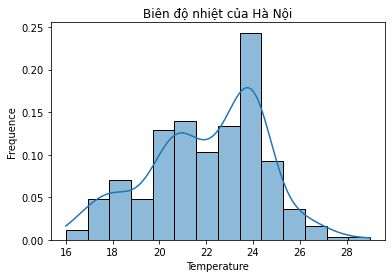

In [18]:
# Phân bố nhiệt độ ở Hà Nội:
sns.histplot(HaNoi_Temperature, kde = True,stat ='density')
plt.title('Biên độ nhiệt của Hà Nội')
plt.xlabel('Temperature')
plt.ylabel('Frequence')
plt.show()

In [19]:
from scipy import stats
stats.describe(HaNoi_Temperature)

DescribeResult(nobs=385, minmax=(16.0, 29.0), mean=22.0012987012987, variance=6.181638933982684, skewness=-0.33747359453082015, kurtosis=-0.4096120904627236)

Kiểm định giả thuyết với T-test, với độ tin cậy 5%. Phương sai variance = 6.18 đã tính ở trên.

In [20]:
stats.ttest_1samp(HaNoi_Temperature, 6.18)

Ttest_1sampResult(statistic=124.85923721495537, pvalue=5.6468772701e-313)

Có thể thấy p_value rất nhỏ( gần như bằng 0), nhỏ hơn rất nhiều so với độ tin cậy 5% nên ta chấp nhận ( không thể bác bỏ) giả thuyết: $ H_1$ : Nhiệt độ trung bình của 4 tháng đầu năm ở Hà Nội tăng. Ta sẽ thử kiểm chừng bằng Visuallize

In [21]:
# Chuyển về dạng date time
data['Data Time S'] = data['Data Time S'].apply(pd.to_datetime)

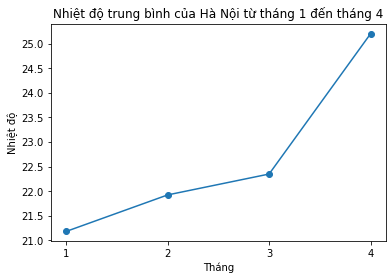

In [22]:
data_temperature_sort = data.sort_values(by='Data Time S')[['City', 'Temperature', 'Month']]
data_use = data_temperature_sort[data_temperature_sort.City == "Hà Nội"]
data_use = data_use.groupby('Month')['Temperature'].mean()
plt.plot(data_use.index, data_use.values, '-o')
plt.xticks(data_use.index)
plt.ylabel("Nhiệt độ")
plt.xlabel("Tháng")
plt.title("Nhiệt độ trung bình của Hà Nội từ tháng 1 đến tháng 4")
plt.show()

Rõ ràng thì nhiệt độ trung bình ở Hà Nội tằng từ thangs 1 đến tháng 4. Ta thử Visualize các tỉnh/thành phố khác có trong dữ liệu xem thế nào

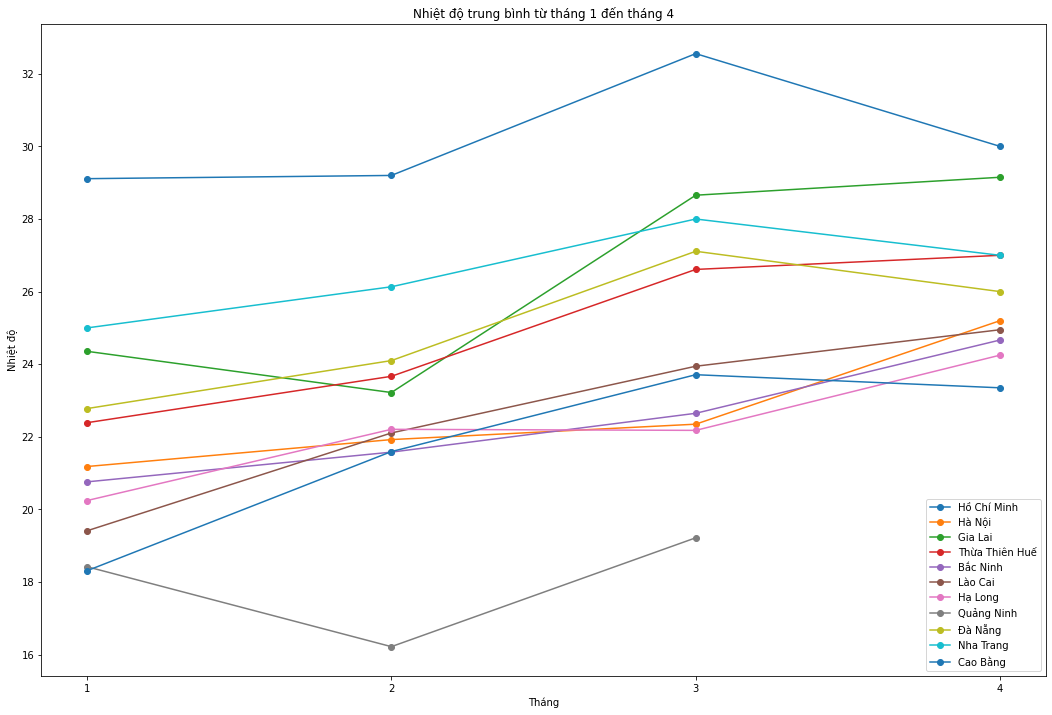

In [23]:
lst_city = data["City"].unique()
plt.figure(figsize=(18, 12))
for city in lst_city:
    data_use = data_temperature_sort[data_temperature_sort.City == city]
    data_use = data_use.groupby('Month')['Temperature'].mean()
    plt.plot(data_use.index, data_use.values, '-o', label=city)
plt.legend()
plt.xticks([1, 2, 3, 4])
plt.ylabel("Nhiệt độ")
plt.xlabel("Tháng")
plt.title("Nhiệt độ trung bình từ tháng 1 đến tháng 4")
plt.show()
    

- Nhận xét: Nhiệt độ trung bình hầu như tăng từ tháng 1 đến tháng 4 ở các tỉnh, đối với một số tỉnh như Nha Trang, Cao Bằng, Đà Nẵng, Hồ Chí Minh thì nhiệt độ giảm từ tháng 3 đến tháng 4. Lấy ví dụ như ở Sài Gòn, tháng 4 là bắt đầu có mưa, có lẽ vì vậy mà nhiệt độ giảm. Theo như các biểu đồ ở trên ta còn thấy được rằng Hồ Chí Minh có nhiệt độ trung bình cao nhất(29-33 độ C), ở Quảng Ninh thì nhiệt độ thấp nhất(15-19 độ C) vào các tháng này.

Tiếp theo ta sẽ tìm hiểu về chỉ số AQI, chỉ số này là chỉ số về chất lượng không khí, và đối chiếu với cột `Alert level` để xem sự ảnh hưởng của chỉ số này đến mức độ cảnh báo 

**insight 2**: So sánh AQI giữa các tỉnh/thành phố. Sự thay đổi AQI của các tỉnh thành phố qua từng tháng

In [24]:
aqi_by_city = data.groupby("City")["AQI index"].mean().sort_values(ascending=False).dropna()
aqi_by_city

City
Cao Bằng          136.911765
Hà Nội            108.578082
Lào Cai           105.285714
Bắc Ninh           99.774648
Hồ Chí Minh        88.514286
Đà Nẵng            64.000000
Thừa Thiên Huế     44.538462
Gia Lai            41.454545
Hạ Long            33.275862
Quảng Ninh         17.800000
Name: AQI index, dtype: float64

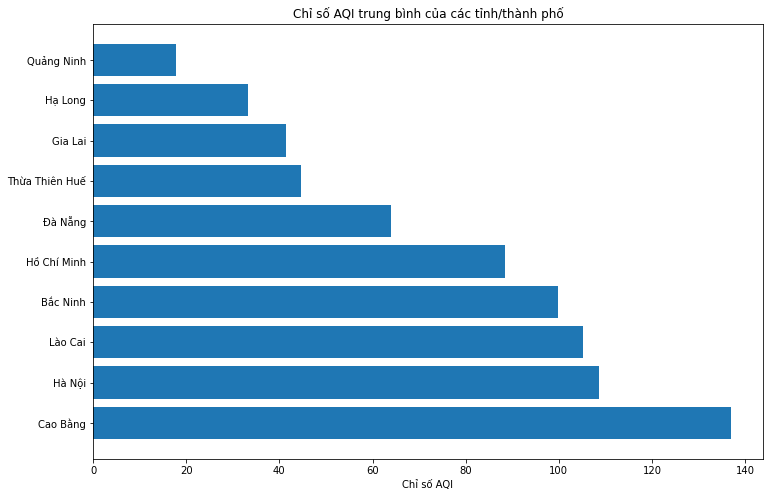

In [25]:
plt.figure(figsize=(12, 8))
plt.barh(y=aqi_by_city.index, width=aqi_by_city.values)
plt.xlabel("Chỉ số AQI")
plt.title("Chỉ số AQI trung bình của các tỉnh/thành phố")
plt.show()

Cao bằng là tỉnh có chỉ số AQI cao nhất, theo thống kê của nguồn này cũng chỉ ra rằng Cao Bằng cao nhất <a href = "https://www.iqair.com/vi/vietnam">nguồn </a>

**insight 3**: So sánh chỉ số bụi mịn `PM2.5` giữa các thành phố

Ở một vài thành phố lớn hiện nay, việc đánh giá chất lượng không khí sẽ dựa trên chỉ số bụi mịn `PM2.5` chứ không còn dựa trên chỉ số `AQI`

In [26]:
pm_by_city = data.groupby("City")["PM2.5"].mean().sort_values(ascending=False).dropna()
pm_by_city

City
Cao Bằng          116.514286
Hà Nội            105.630986
Lào Cai           104.828571
Bắc Ninh           92.351648
Hồ Chí Minh        88.514286
Đà Nẵng            64.400000
Gia Lai            40.742857
Thừa Thiên Huế     34.000000
Hạ Long            32.612903
Quảng Ninh         17.085714
Name: PM2.5, dtype: float64

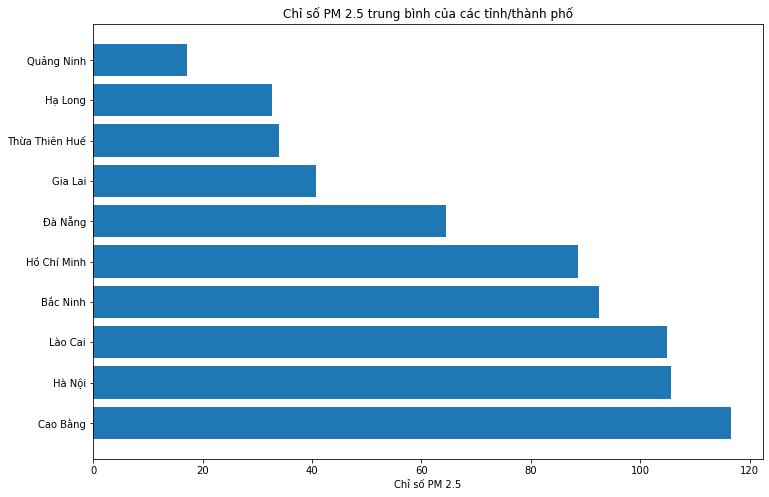

In [27]:
plt.figure(figsize=(12, 8))
plt.barh(y=pm_by_city.index, width=pm_by_city.values)
plt.xlabel("Chỉ số PM 2.5")
plt.title("Chỉ số PM 2.5 trung bình của các tỉnh/thành phố")
plt.show()

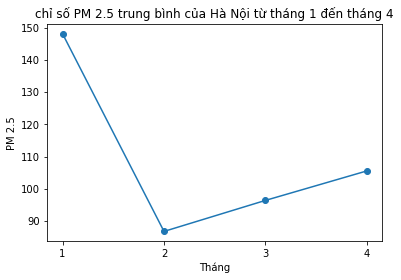

In [28]:
data_pm_sort = data.sort_values(by='Data Time S')[['City', 'PM2.5', 'Month']]
data_pm_hn = data_pm_sort[data_pm_sort.City == "Hà Nội"]
data_pm_hn = data_pm_hn.groupby('Month')['PM2.5'].mean()
plt.plot(data_pm_hn.index, data_pm_hn.values, '-o')
plt.xticks(data_pm_hn.index)
plt.ylabel("PM 2.5")
plt.xlabel("Tháng")
plt.title("chỉ số PM 2.5 trung bình của Hà Nội từ tháng 1 đến tháng 4")
plt.show()

Ta nhận thấy rằng chỉ số `PM2.5` có sự giảm mạnh vào tháng 2. Có thể bởi vì tết Âm Lịch thường rơi vào tháng 2, các công ty xí nghiệp lớn giảm hoạt động và người dân cũng giảm bớt ra đường đi làm => chỉ số bụi min `PM2.5` được giảm rõ rệt

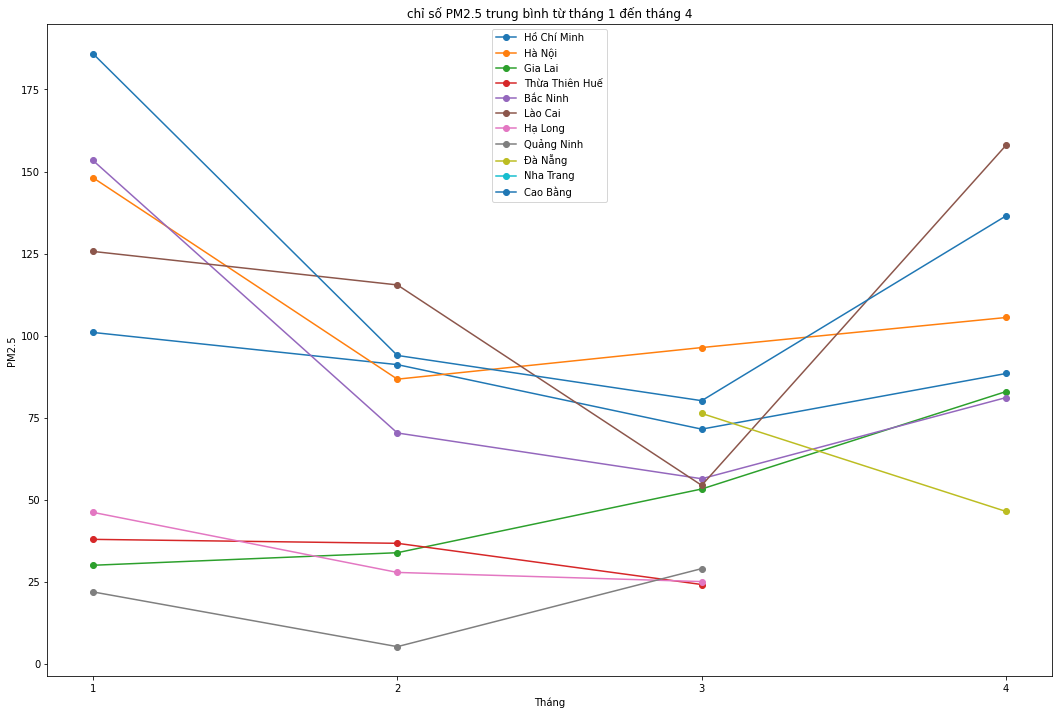

In [32]:
plt.figure(figsize=(18, 12))
for city in lst_city:
    data_pm_hn = data_pm_sort[data_pm_sort.City == city]
    data_pm_hn = data_pm_hn.groupby('Month')['PM2.5'].mean()
    plt.plot(data_pm_hn.index, data_pm_hn.values, '-o', label=city)
plt.legend()
plt.xticks(data_pm_hn.index)
plt.ylabel("PM2.5")
plt.xlabel("Tháng")
plt.title("chỉ số PM2.5 trung bình từ tháng 1 đến tháng 4")
plt.show()

Ta có thể thấy rõ xu hướng giảm rõ rệt của chỉ số `PM2.5` vào tháng 2 ở các tỉnh/thành phố `Hồ Chí Minh, Hà Nội, Bắc Ninh,...`. Đây đều là các trung tâm công nghiệp lớn và trọng yếu của cả nước